# Is there a relationship between languages for a title and country availability?

In [1]:
# Dependencies and Setup
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Study data files
netflix_data_path = "../ed_netflix/netflix_country.csv"

# Read the mouse data and the study results
netflix_data = pd.read_csv(netflix_data_path)
netflix_data

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/08 0:00,3/4/21 0:00,205926.0
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,R,5.8,79.0,69.0,1.0,NaN,70632.0,5/8/20 0:00,3/4/21 0:00,2838.0
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,NaN,7.4,NaN,NaN,NaN,NaN,NaN,12/3/20 0:00,3/3/21 0:00,131.0
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,7.5,NaN,NaN,2.0,4.0,NaN,6/14/11 0:00,3/3/21 0:00,47.0
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,Lithuania,1-2 hour,NaN,6.7,NaN,NaN,2.0,1.0,NaN,10/31/49 0:00,3/3/21 0:00,88.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122890,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,Brazil,< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/15 0:00,71.0
122891,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,Netherlands,< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/15 0:00,71.0
122892,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,Italy,< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/15 0:00,71.0
122893,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,Israel,< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/15 0:00,71.0


In [2]:
netflix_data.head()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
0,Lets Fight Ghost,"Crime, Drama, Fantasy, Horror, Romance","Comedy Programmes,Romantic TV Comedies,Horror ...","Swedish, Spanish",Series,4.3,Thailand,< 30 minutes,R,7.9,98.0,82.0,74.0,57.0,2122065.0,12/12/08 0:00,3/4/21 0:00,205926.0
1,HOW TO BUILD A GIRL,Comedy,"Dramas,Comedies,Films Based on Books,British",English,Movie,7.0,Canada,1-2 hour,R,5.8,79.0,69.0,1.0,NaN,70632.0,5/8/20 0:00,3/4/21 0:00,2838.0
2,The Con-Heartist,"Comedy, Romance","Romantic Comedies,Comedies,Romantic Films,Thai...",Thai,Movie,8.6,Thailand,> 2 hrs,NaN,7.4,NaN,NaN,NaN,NaN,NaN,12/3/20 0:00,3/3/21 0:00,131.0
3,Gleboka woda,Drama,"TV Dramas,Polish TV Shows,Social Issue TV Dramas",Polish,Series,8.7,Poland,< 30 minutes,NaN,7.5,NaN,NaN,2.0,4.0,NaN,6/14/11 0:00,3/3/21 0:00,47.0
4,Only a Mother,Drama,"Social Issue Dramas,Dramas,Movies Based on Boo...",Swedish,Movie,8.3,Lithuania,1-2 hour,NaN,6.7,NaN,NaN,2.0,1.0,NaN,10/31/49 0:00,3/3/21 0:00,88.0


In [3]:
netflix_data.tail()

,Title,Genre,Tags,Languages,Series or Movie,Hidden Gem Score,Country Availability,Runtime,View Rating,IMDb Score,Rotten Tomatoes Score,Metacritic Score,Awards Received,Awards Nominated For,Boxoffice,Release Date,Netflix Release Date,IMDb Votes
122890,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,Brazil,< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/15 0:00,71.0
122891,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,Netherlands,< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/15 0:00,71.0
122892,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,Italy,< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/15 0:00,71.0
122893,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,Israel,< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/15 0:00,71.0
122894,DreamWorks Happy Holidays from Madagascar,"Animation, Comedy, Family","TV Comedies,Kids TV,Animal Tales,TV Cartoons,T...",English,Series,8.4,Colombia,< 30 minutes,NaN,6.8,NaN,NaN,NaN,NaN,NaN,NaN,4/14/15 0:00,71.0


In [4]:
#print data types
netflix_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122895 entries, 0 to 122894
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Title                  122895 non-null  object 
 1   Genre                  122726 non-null  object 
 2   Tags                   122444 non-null  object 
 3   Languages              119364 non-null  object 
 4   Series or Movie        122895 non-null  object 
 5   Hidden Gem Score       122714 non-null  float64
 6   Country Availability   122884 non-null  object 
 7   Runtime                122893 non-null  object 
 8   View Rating            88147 non-null   object 
 9   IMDb Score             122716 non-null  float64
 10  Rotten Tomatoes Score  55437 non-null   float64
 11  Metacritic Score       38613 non-null   float64
 12  Awards Received        60913 non-null   float64
 13  Awards Nominated For   76591 non-null   float64
 14  Boxoffice              31065 non-nul

In [5]:
# Remove the rows with missing data, if any!
clean_netflix_data_df = netflix_data.dropna(how="any")
clean_netflix_data_df.count()
clean_netflix_data_df["Country Availability"].value_counts()

Switzerland       697
Czech Republic    655
South Korea       641
Germany           637
Hungary           633
Japan             627
Belgium           622
Canada            610
Romania           597
Italy             597
Hong Kong         579
United Kingdom    563
Slovakia          560
Turkey            555
Poland            554
Australia         544
India             544
France            538
Argentina         526
Mexico            524
Singapore         522
Colombia          521
Sweden            517
Thailand          514
Malaysia          503
Brazil            502
Netherlands       502
Spain             496
Greece            496
Portugal          447
Russia            439
Israel            428
South Africa      420
Lithuania         419
Iceland           360
United States     328
Name: Country Availability, dtype: int64

In [6]:
netflix_country = clean_netflix_data_df.groupby(by="Title")["Country Availability"].count()


In [7]:
country = netflix_country.to_frame()
country.rename(columns={"Availability":"Country Availability"},inplace=True)
country

,Country Availability
Title,
12 Monkeys,12
12 Years a Slave,7
127 Hours,3
12:08 East of Bucharest,1
17 Again,8
...,...
[Rec] 3: Genesis,1
conjuring 2,10
"sex, lies, and videotape",10


In [8]:
netflix_language = pd.read_csv('../ed_netflix/netflix_language.csv')

In [9]:
language = netflix_language.dropna(how="any")
language.count()
language["Languages"].value_counts()

English       2140
French         336
Spanish        329
German         188
Russian        137
              ... 
Papiamento       1
Croatian         1
Syriac           1
Aramaic          1
Quenya           1
Name: Languages, Length: 126, dtype: int64

In [10]:
netflix_language= language.groupby(by="Title")["Languages"].count()
language_2 = netflix_language.to_frame()
language_2.rename(columns={"Languages":"Number of Languages"},inplace=True)
language_2

,Number of Languages
Title,
12 Monkeys,2
12 Years a Slave,1
127 Hours,2
12:08 East of Bucharest,1
17 Again,1
...,...
[Rec] 3: Genesis,3
conjuring 2,1
"sex, lies, and videotape",1


In [11]:
newset = pd.merge(netflix_language, country, how='inner', on='Title')
newset

,Languages,Country Availability
Title,,
12 Monkeys,2,12
12 Years a Slave,1,7
127 Hours,2,3
12:08 East of Bucharest,1,1
17 Again,1,8
...,...,...
[Rec] 3: Genesis,3,1
conjuring 2,1,10
"sex, lies, and videotape",1,10


In [12]:
newset_2 = newset.groupby(by="Languages").mean()
newset_2=newset_2.reset_index()
newset_2

,Languages,Country Availability
0,1,8.050086
1,2,8.619125
2,3,8.403042
3,4,10.090164
4,5,8.267857
5,6,9.387097
6,7,14.000000
7,8,15.666667
8,9,10.285714
9,10,8.500000


In [13]:
newset_2 = newset.groupby(["Languages"])["Country Availability"].mean()
newset_2=newset_2.reset_index()
newset_2

,Languages,Country Availability
0,1,8.050086
1,2,8.619125
2,3,8.403042
3,4,10.090164
4,5,8.267857
5,6,9.387097
6,7,14.000000
7,8,15.666667
8,9,10.285714
9,10,8.500000


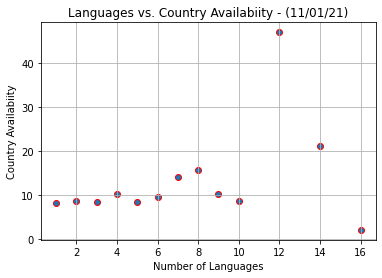

In [14]:
plt.scatter(newset_2["Languages"], newset_2["Country Availability"], alpha=1.0, edgecolor='red')
plt.title(f"Languages vs. Country Availabiity - ({time.strftime('%D')})")
plt.xlabel("Number of Languages")
plt.ylabel("Country Availabiity")
plt.grid(True)
plt.show()

# Correlation and Regression

In [15]:

# use the pearson formula and the average calculated above to determin r-value.
# if r-value is close to 1, there is a high degree of correlation 
# if r-value is close to 0, there is no correlation
# if r-value is close to -1 suggests there is negative correlation

correlation_coeff = round(st.pearsonr(newset_2['Languages'], newset_2['Country Availability'])[0], 4)
correlation_coeff

0.326

In [17]:
#we can find the a linear model using st.linregression
linear_model = st.linregress(newset_2['Languages'], newset_2['Country Availability'])
linear_model

LinregressResult(slope=0.7833001697647306, intercept=7.3299719473051335, rvalue=0.3259988190636217, pvalue=0.2770290167187087, stderr=0.6848851482673445, intercept_stderr=5.9495014701114375)

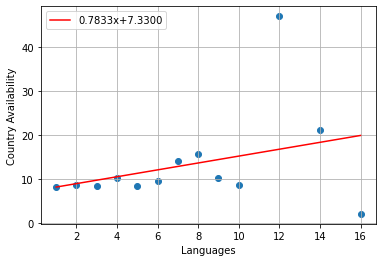

In [21]:
#linear regression model 
slope=0.7833001697647306
intercept=7.3299719473051335

regression_model = slope*(newset_2['Languages']) + intercept
plt.scatter(newset_2['Languages'], newset_2['Country Availability'])
plt.plot(newset_2['Languages'], regression_model, 'r', label='{:.4f}x+{:.4f}'.format(slope, intercept))
plt.legend()
plt.xlabel('Languages')
plt.ylabel('Country Availability')
plt.grid(True)
plt.show()

In [22]:
# Set x axis and tick locations
x_axis = np.arange(len(newset_2))
tick_locations = [value+0.4 for value in x_axis]

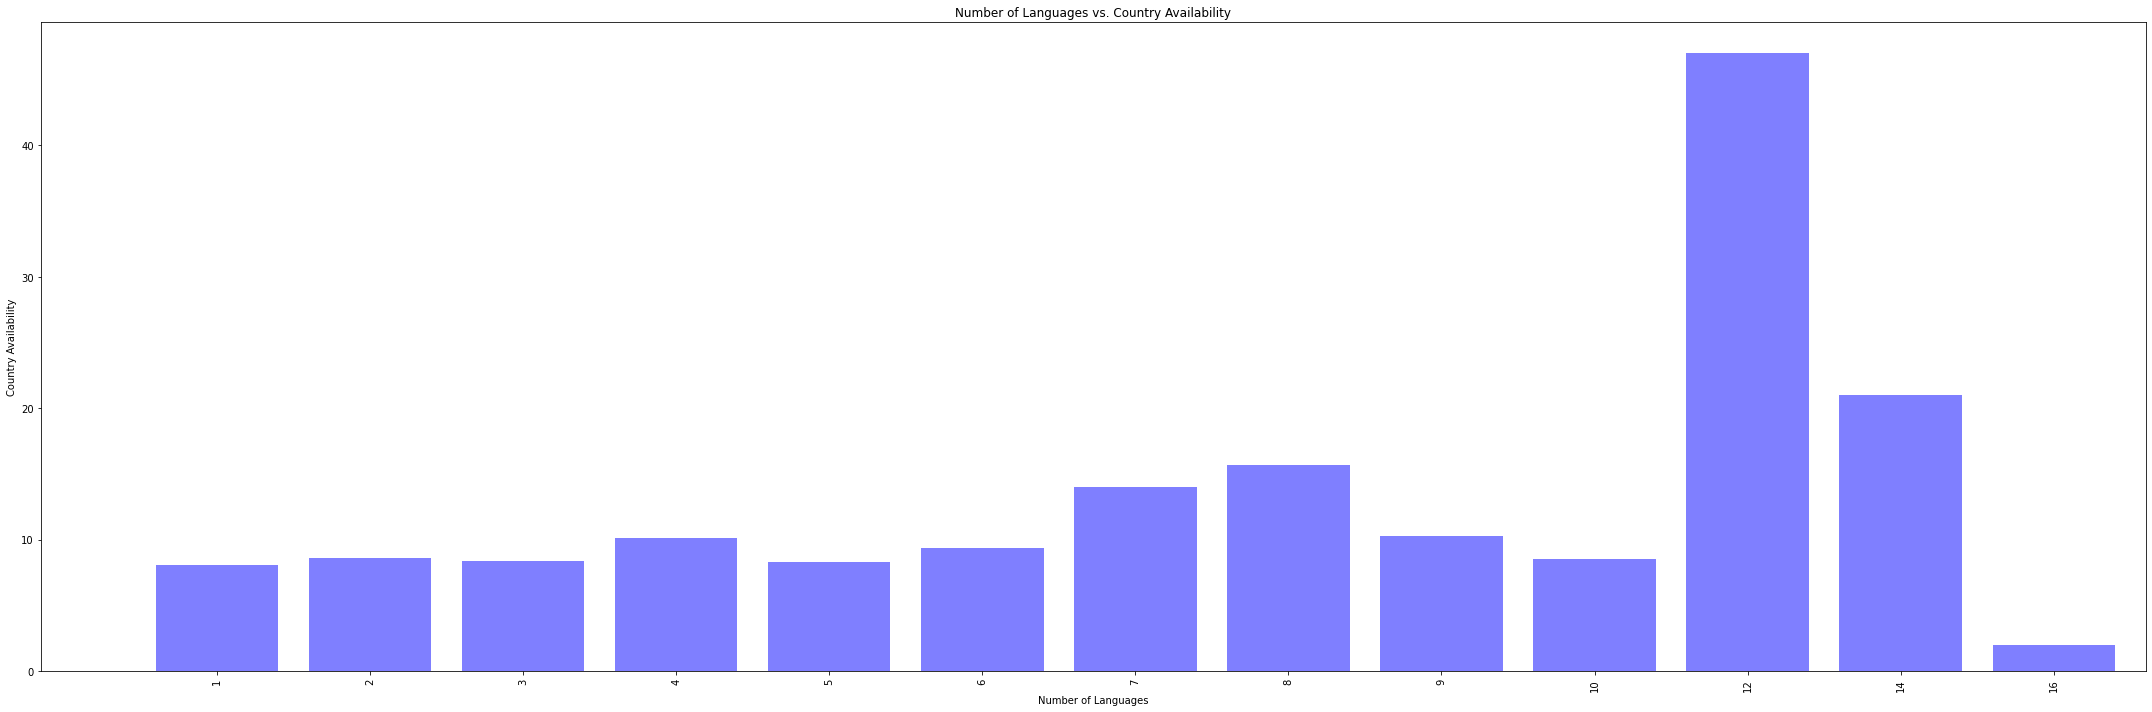

In [23]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(30,10))
plt.bar(x_axis, newset_2["Country Availability"], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, newset_2["Languages"], rotation="vertical")
plt.xlim(-0.75, len(x_axis))
# plt.ylim(0, max(newset_2["Languages"])+35)

plt.title("Number of Languages vs. Country Availability")
plt.xlabel("Number of Languages")
plt.ylabel("Country Availability")
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("../ed_netflix/lanVcountry.png")
plt.show()